# Chapter 2

## descriptive statistics using numpy and matplotlib

In [9]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
# get California housing dataset
data = sklearn.datasets.fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

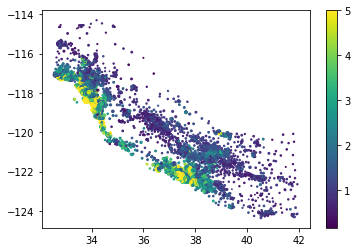

In [3]:
# scatter plot (latitude, longitude, median income, and cost)
plt.scatter(X[:, 6], X[:, 7], s=X[:, 0], c=y)
plt.colorbar();

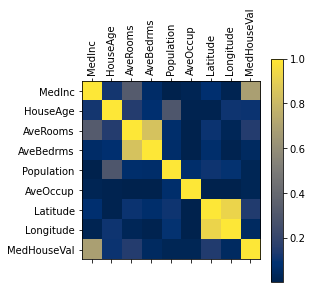

In [38]:
# co-variance heat map
from matplotlib import cm
X_y = np.concatenate((X, y), axis=1)
cov = np.corrcoef(X_y.T)
ax = plt.matshow(abs(cov), cmap=cm.cividis)
plt.colorbar()

ticks = data.feature_names + data.target_names
plt.xticks(range(len(ticks)), ticks, rotation=90)
plt.yticks(range(len(ticks)), ticks);

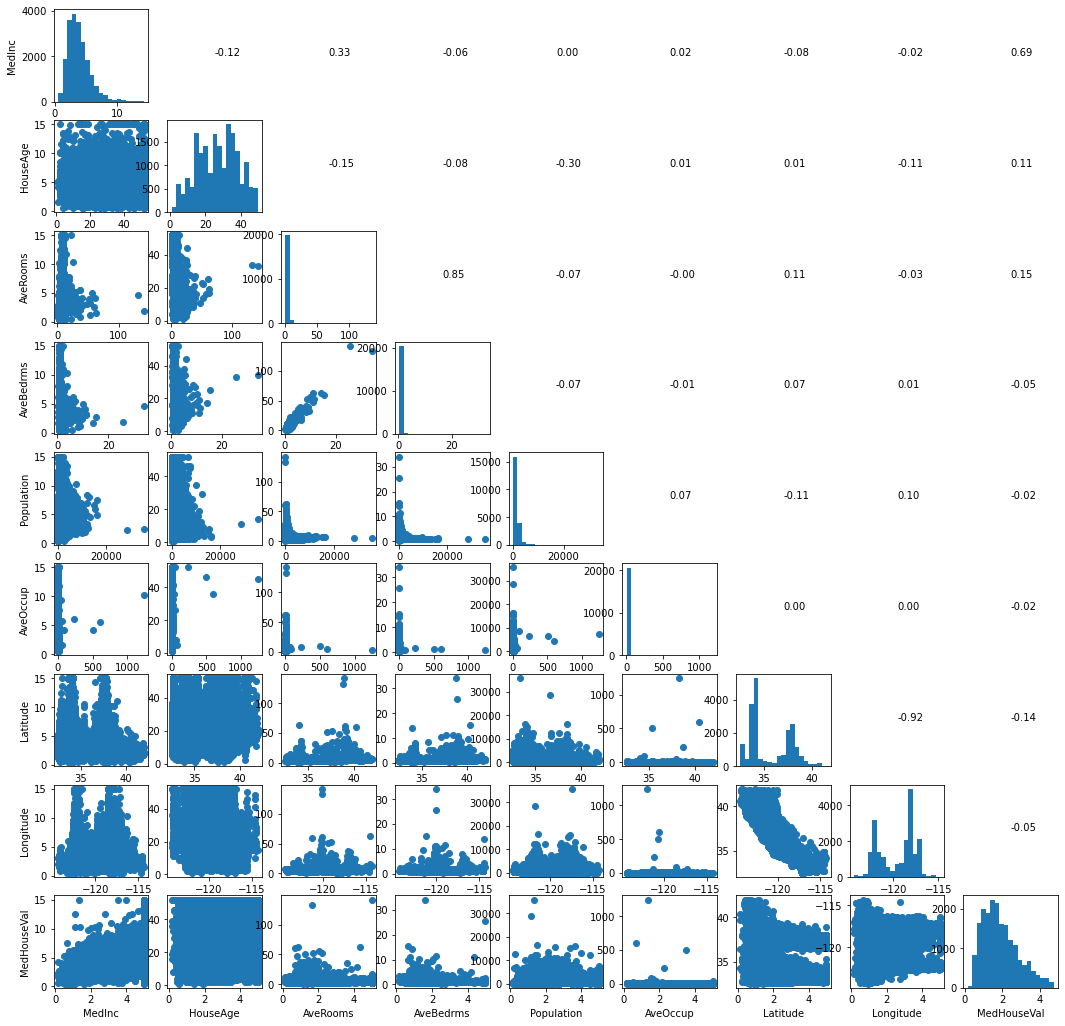

In [39]:
# scatter matrix
n = X_y.shape[1]
fig, axes = plt.subplots(figsize=(n*2, n*2), nrows=n, ncols=n)
for i in range(n):
    for j in range(n):
        plt.sca(axes[i, j])
        if i==n-1: plt.xlabel(ticks[j])
        if j==0: plt.ylabel(ticks[i])
        if i==j:
            da = X_y[:, i]
            plt.hist(X_y[:, i], 
                     bins = np.arange(min(da), max(da), (max(da)-min(da))/20))
        else:
            if i>j:
                plt.scatter(X_y[:, i], X_y[:, j])
            else:
                plt.text(0, 0, f'{cov[i, j]:.2f}')
                plt.xlim([-1, 1])
                plt.ylim([-1, 1])
                plt.axis('off')

## descriptive statistics and visualisation using pandas

In [2]:
import pandas as pd

file = 'C:/Users/manav.singh/Documents/GitHub/learn_python/datasets/housing/housing.csv'
housing = pd.read_csv(file)

housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


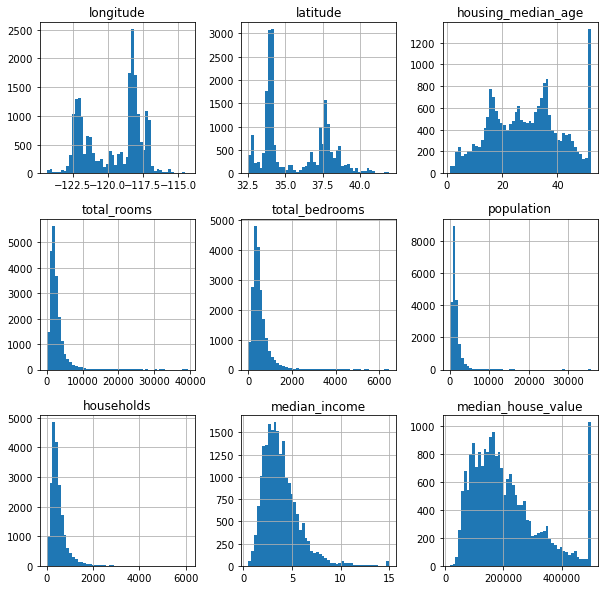

In [3]:
housing.hist(figsize=(10, 10), bins=50);

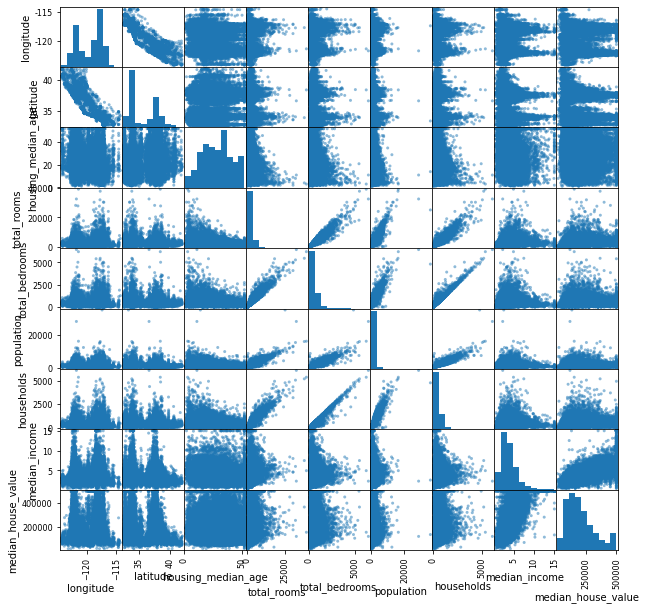

In [4]:
pd.plotting.scatter_matrix(housing, figsize=(10, 10));

In [6]:
housing.index = housing.longitude * 1000 + housing.latitude

In [11]:
housing['income_cat'] = pd.cut(housing.median_income, bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = range(1, 6))

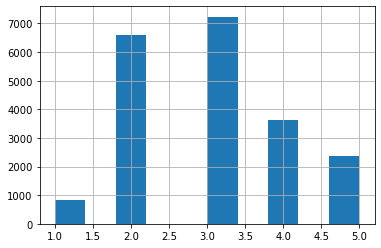

In [14]:
housing.income_cat.hist();

In [28]:
housing.reset_index(inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

[[train_index, test_index]] = split.split(housing, housing.income_cat)

strat_train_test = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

In [40]:
print(strat_test_set.income_cat.value_counts()/len(strat_test_set))
print(housing.income_cat.value_counts()/len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income, dtype: float64


In [41]:
housing = strat_train_test.copy()

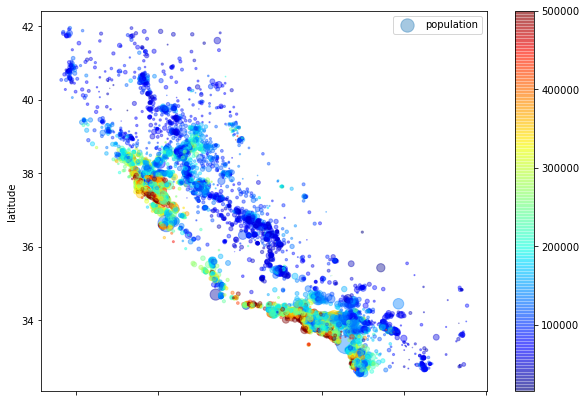

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude', s=housing.population/100, label='population', alpha=0.4,
            figsize=(10,7), c=housing.median_house_value, cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend();

In [56]:
housing.drop('index', axis=1, inplace=True)
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

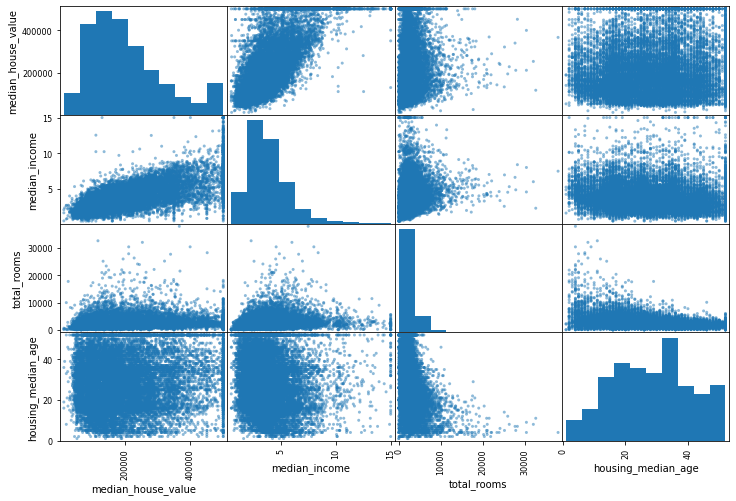

In [58]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8));

## experimenting with attribute combinations

In [60]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.total_bedrooms / housing.households

corr_matrix = housing.corr()['median_house_value'].sort_values(ascending=False)
print(corr_matrix)

median_house_value          1.000000
median_income               0.688883
rooms_per_household         0.157620
total_rooms                 0.137469
housing_median_age          0.107144
households                  0.069177
total_bedrooms              0.053544
population                 -0.023797
longitude                  -0.043236
population_per_household   -0.048998
latitude                   -0.145570
bedrooms_per_room          -0.255870
Name: median_house_value, dtype: float64


## prepare the data for ML algorithms
to allow reproduce results, library for further transformations, easily try various transformations

In [74]:
housing = strat_train_test.drop(['index', 'median_house_value'], axis=1)
housing_label = strat_train_test.median_house_value.copy()

## data cleaning
##### remove samples, remove attribute, or impute zero, mean, or median value

In [76]:
housing.dropna(axis=0).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000
mean,-119.563584,35.624081,28.605666,2631.599486,537.118514,1426.176334,498.990884,3.870643
std,2.003603,2.137267,12.557823,2170.761043,418.994461,1141.322516,380.798092,1.899953
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.780000,33.930000,18.000000,1451.750000,297.000000,790.000000,281.000000,2.562500
50%,-118.490000,34.250000,29.000000,2128.500000,436.000000,1167.000000,410.000000,3.535700
75%,-118.000000,37.710000,37.000000,3136.250000,646.000000,1724.000000,604.000000,4.750000
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In [78]:
housing.dropna(axis=1).describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.562491,35.622912,28.609133,2630.597929,1426.409157,498.981892,3.870188
std,2.004192,2.137609,12.551133,2166.138917,1139.844349,380.336179,1.900677
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900
25%,-121.782500,33.930000,18.000000,1448.750000,789.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2128.500000,1167.000000,410.000000,3.534100
75%,-118.000000,37.710000,37.000000,3142.000000,1726.000000,605.000000,4.750000
max,-114.470000,41.950000,52.000000,37937.000000,35682.000000,6082.000000,15.000100


In [79]:
housing.total_bedrooms.fillna(housing.total_bedrooms.median())

10275     531.0
20601     103.0
20138     282.0
18028     244.0
16289     766.0
          ...  
6358      348.0
618       819.0
3407      285.0
17590     587.0
4303     1190.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop(['income_cat', 'ocean_proximity'], axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [91]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [92]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [97]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## handling text and categorical attributes

In [105]:
housing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])
print(encoder.categories_)

[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [4.]
 [0.]
 [4.]
 [1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [107]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)
print(type(housing_cat_one_hot))

<class 'scipy.sparse.csr.csr_matrix'>


## custom transformers

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributes()
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs[0])

[-117.87 33.86 28.0 2292.0 531.0 2197.0 509.0 3.4856 '<1H OCEAN' 3
 4.50294695481336 4.31630648330059 0.23167539267015708]


## feature scaling

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                        ('attribs_adder', CombinedAttributes()),
                        ('std_scalar', StandardScaler())
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[0]

array([ 0.84450121, -0.82473693, -0.04853356, -0.15631878, -0.01220643,
        0.67606966,  0.02634094, -0.20234886, -0.38320306,  0.11361593,
        0.28225234])

In [143]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

## select and train a model

In [155]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

housing_predictions = lin_reg.predict(housing_prepared)

from sklearn.metrics import mean_squared_error as mse
error = mse(housing_label.values, housing_predictions)
print(np.sqrt(error))

In [159]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_tree_predictions = tree_reg.predict(housing_prepared)
tree_error = mse(housing_label.values, housing_tree_predictions)
print(np.sqrt(tree_error))

0.0


## better evaluation using cross-validation

In [163]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
tree_rmse = np.sqrt(-tree_scores)

def display_score(scores):
    print(f'Scores: {scores}\nMean: {scores.mean():.0f}\nStd: {scores.std():.0f}')
    
display_score(tree_rmse) 

Scores: [70091.55802907 72307.885377   69766.69214731 69651.62784067
 70926.68474906 69029.89456362 73067.59257175 72388.76069552
 66233.80263813 71540.75749081]
Mean: 70501
Std: 1910


In [164]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
display_score(np.sqrt(-lin_scores))

Scores: [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Mean: 68481
Std: 1456


In [165]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
display_score(np.sqrt(-forest_scores))

Scores: [49472.11400237 53506.67573484 48419.63538955 50056.89365734
 51486.87401596 48238.90967045 49412.83005297 50586.39292414
 50622.66736465 51731.51553051]
Mean: 50353
Std: 1524
